In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Diabetic', 'Diabetic']); ax.yaxis.set_ticklabels(['Not Diabetic', 'Diabetic']) 
    plt.show() 

In [3]:
path = r"C:\Users\Abdulrhman Alsir\Desktop\Data Science\diabetes.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [37]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Accuracy Score: ', rf_accuracy)
print('Classification Report:')
print(class_report)

Accuracy Score:  0.8116883116883117
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



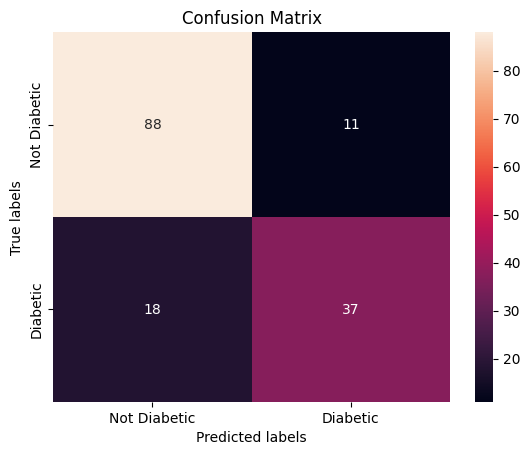

In [35]:
plot_confusion_matrix(y_test, y_pred)

In [28]:
svm = SVC(kernel='linear', C=1, gamma=10)
svc_model = svm.fit(X_train, y_train)
yhat = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, yhat)
print(svc_accuracy)

0.7792207792207793


In [38]:
parameters = {'kernel':('linear','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm_cv = GridSearchCV(cv=10, param_grid=parameters, estimator=svm)
svm_cv.fit(X_train, y_train)

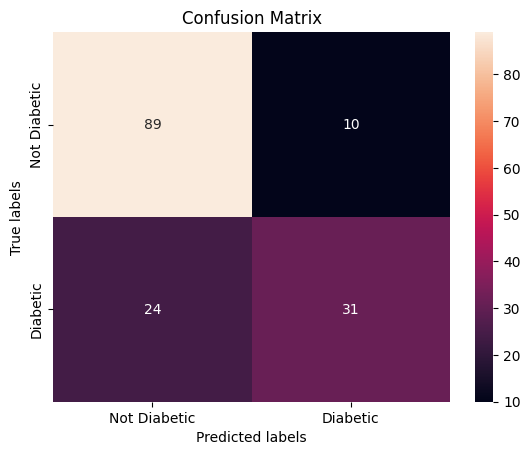

In [16]:
plot_confusion_matrix(y_test, yhat)

In [17]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(cv=10, estimator=tree, param_grid=parameters)
tree_cv.fit(X_train, y_train)
print("Tuned Hyperparameters :(Best Parameters) ",tree_cv.best_params_)
print("Accuracy :",tree_cv.best_score_)

Tuned Hyperparameters :(Best Parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy : 0.7376520359598097


c:\Users\Abdulrhman Alsir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abdulrhman Alsir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abdulrhman Alsir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Abdulrhman Alsir\AppData\Local\Programs\

0.7792207792207793


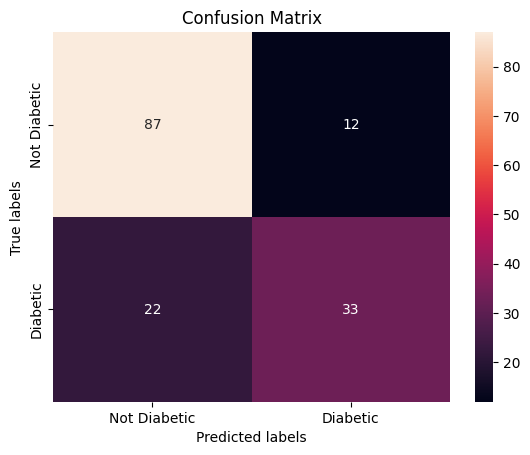

In [39]:
tree_accuracy = tree_cv.score(X_test, y_test)
print(accuracy)
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [19]:
knn_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()

In [21]:
knn_cv = GridSearchCV(cv=10, estimator=KNN, param_grid=knn_parameters)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [23]:
print("Tuned Hyerparameters :(Best Parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

Tuned Hyerparameters :(Best Parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2}
Accuracy : 0.7328133262823904


In [25]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.8116883116883117

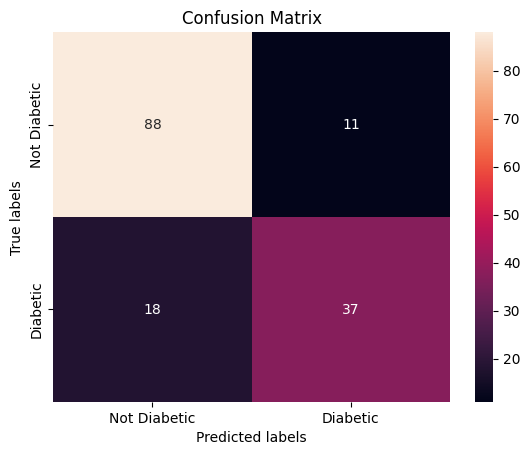

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

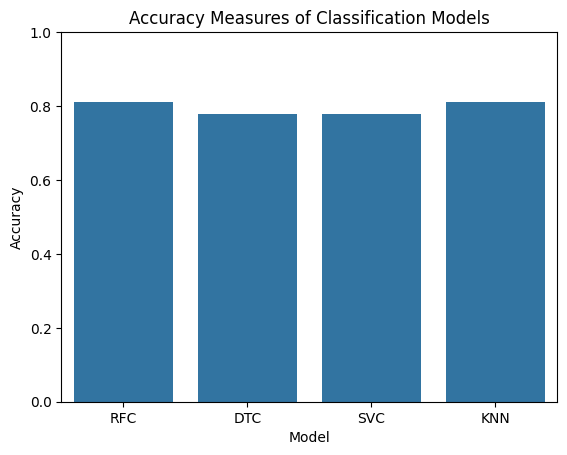

In [44]:
accu = [rf_accuracy, tree_accuracy, svc_accuracy, knn_accuracy]
l = ['RFC', 'DTC', 'SVC', 'KNN']
sns.barplot(x=l, y=accu)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Measures of Classification Models')
plt.ylim(0,1)
plt.show()

In [45]:
print('From the chart above we conclude the KNN and Random Forest Classifier has higher accuracy than SVC and Decision Tree Classifier')

From the chart above we conclude the KNN and Random Forest Classifier has higher accuracy than SVC and Decision Tree Classifier
